# Limpieza y preprocesamiento del Dataset de Airbnb NYC

En este notebook realizamos el proceso de exploración, limpieza y preparación del dataset de Airbnb NYC.  
El objetivo es dejar un conjunto de datos estructurado, limpio y listo para usarse en modelos de Machine Learning.
1. Carga y exploración inicial de datos  
2. Tratamiento de valores faltantes  
3. Detección y manejo de *outliers*  
4. Transformaciones numéricas  
5. Codificación de variables categóricas  
6. Reducción de dimensionalidad (agrupación de categorías poco frecuentes)  
7. Matriz de correlaciones  
8. Exportación del dataset limpio para su uso en el modelado

## Sección 1. Carga de datos y exploación inicial

- Carga de librerías
- Importación de csv
- Cantidad de registros
- Tipos de variables
- Posibles problemas de calidad

In [4]:
#Importar librerías 
import pandas as pd
import seaborn as sn
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [5]:
#importar archvo csv
df=pd.read_csv("C:/Users/andre/OneDrive/Data_Cleaning_Portfolio/01_Airbnb_Cleaning_Project/data_raw/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Revisión de estructura de datos 
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Sección 2. Exploración de los datos 
- Valores nulos
- Análisis de valores faltantes

In [7]:
#Arrojar datos nulos en una tabla con porcentajes 
nulos=df.isnull().sum().to_frame("nulos")
nulos["porcentaje"]=(nulos["nulos"]/len(df)*100)
nulos[nulos["nulos"]>0]

,nulos,porcentaje
name,16,0.032723
host_name,21,0.042949
last_review,10052,20.558339
reviews_per_month,10052,20.558339


In [8]:
df.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [9]:
df.describe(include="object")

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [10]:
df.describe(include="number")

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
#eliminación de variables que no aportan
df=df.drop(columns=["id","host_id","name","host_name"])

In [12]:
#modificar formato de fecha
df["last_review"]=pd.to_datetime(df["last_review"])

In [13]:
#en reviews per month se deben modificar nulos por 0, un nulo significa que no tuvo reviews
df["reviews_per_month"]=df["reviews_per_month"].fillna(0)

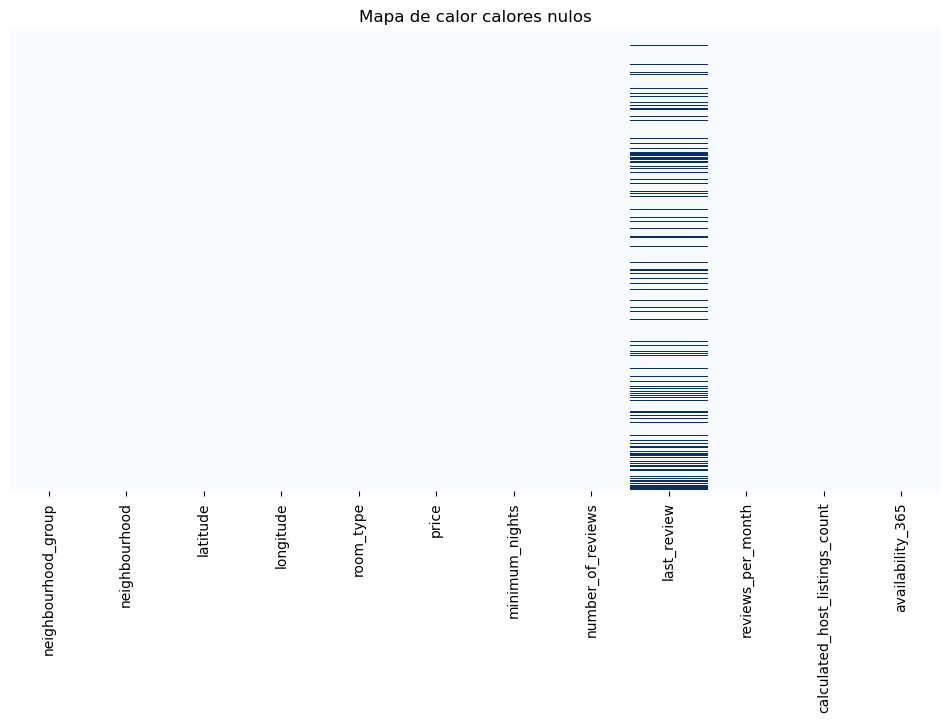

In [14]:
#visualizar valores nulos en mapas de calor
plt.figure(figsize=(12,6))
sn.heatmap(df.isnull(), cmap="Blues", cbar=False, yticklabels=False)
plt.title("Mapa de calor calores nulos")
plt.savefig(r"C:\Users\andre\OneDrive\Data_Cleaning_Portfolio\01_Airbnb_Cleaning_Project\figures\mapa_calor_nulos.png", dpi=300, bbox_inches='tight')

plt.show()

In [15]:
#Gráfico de barras con valores nulos 
nulos=df.isnull().sum().sort_values(ascending=False)
nulos=nulos[nulos>0]

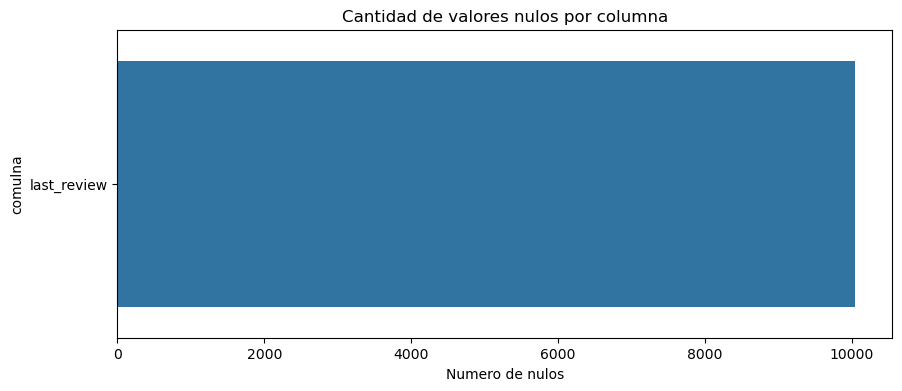

In [16]:
plt.figure(figsize=(10,4))
sn.barplot(x=nulos.values, y=nulos.index)
plt.title("Cantidad de valores nulos por columna")
plt.xlabel("Numero de nulos")
plt.ylabel("comulna")
plt.show()

## Sección 3. Tratamiento de outliers 
- Detección de outliers
- Análisis de dónde provienen
- Decisiones para cada tipo
- 1. Winzorizar
  2. Colocar topes
  3. Transformaciones 

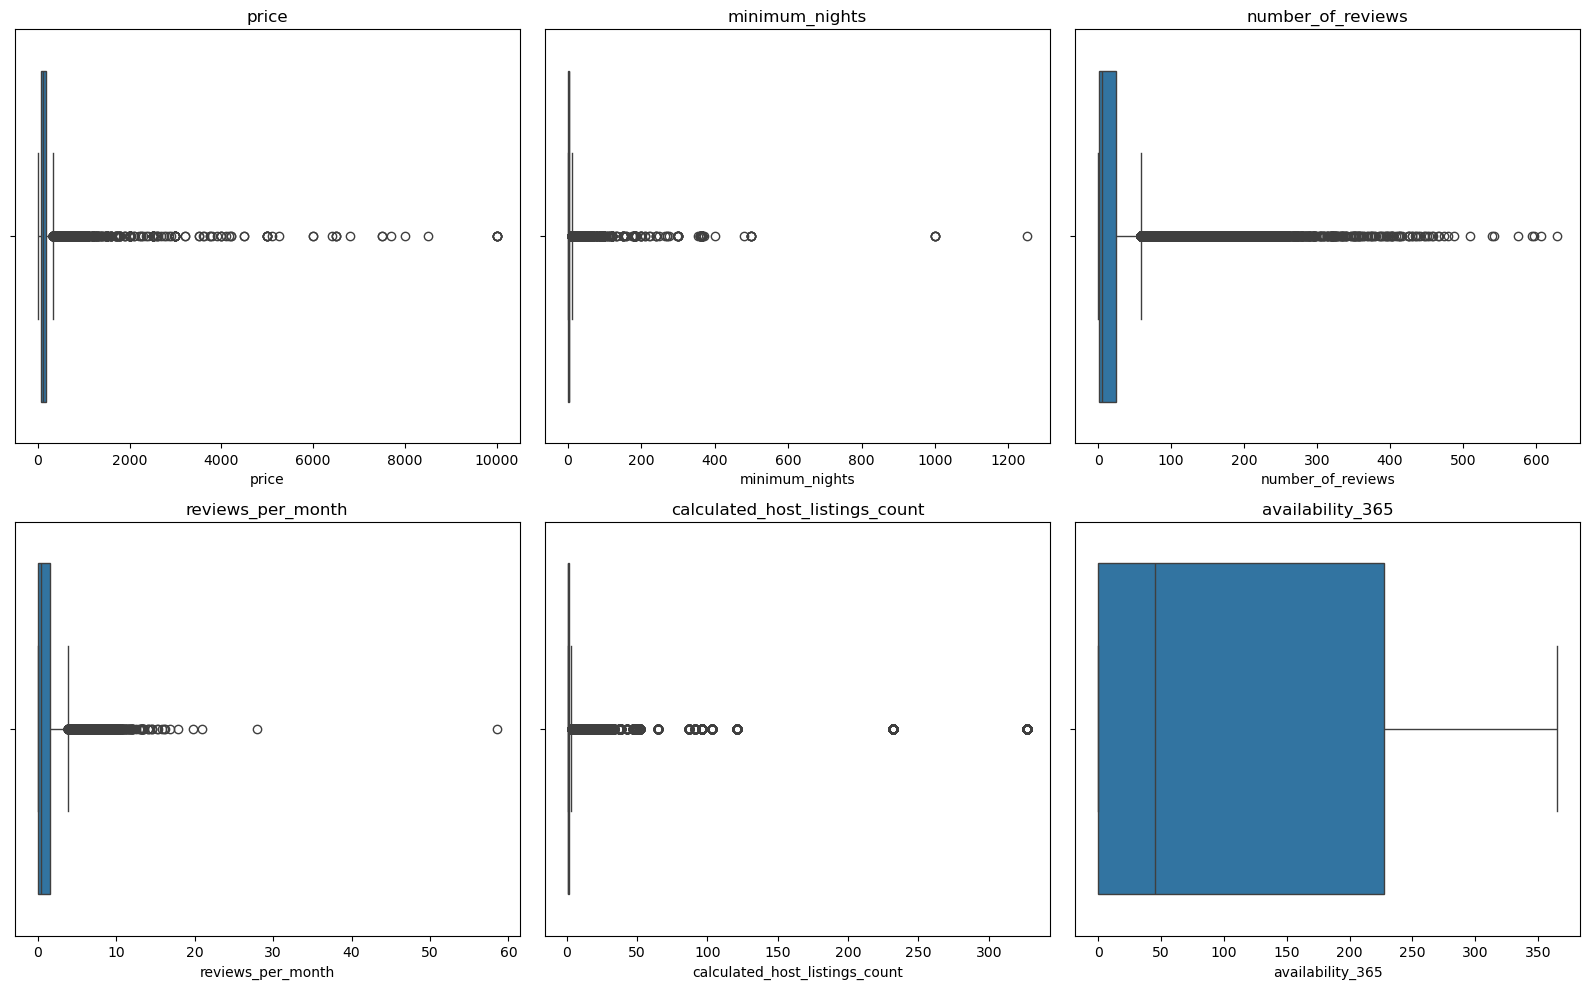

In [17]:
#Búsqueda de outliers 
num_cols=["price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]

plt.figure(figsize=(16,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3, i)
    sn.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig(r"C:\Users\andre\OneDrive\Data_Cleaning_Portfolio\01_Airbnb_Cleaning_Project\figures\outliers.png", dpi=300, bbox_inches='tight')

plt.show()

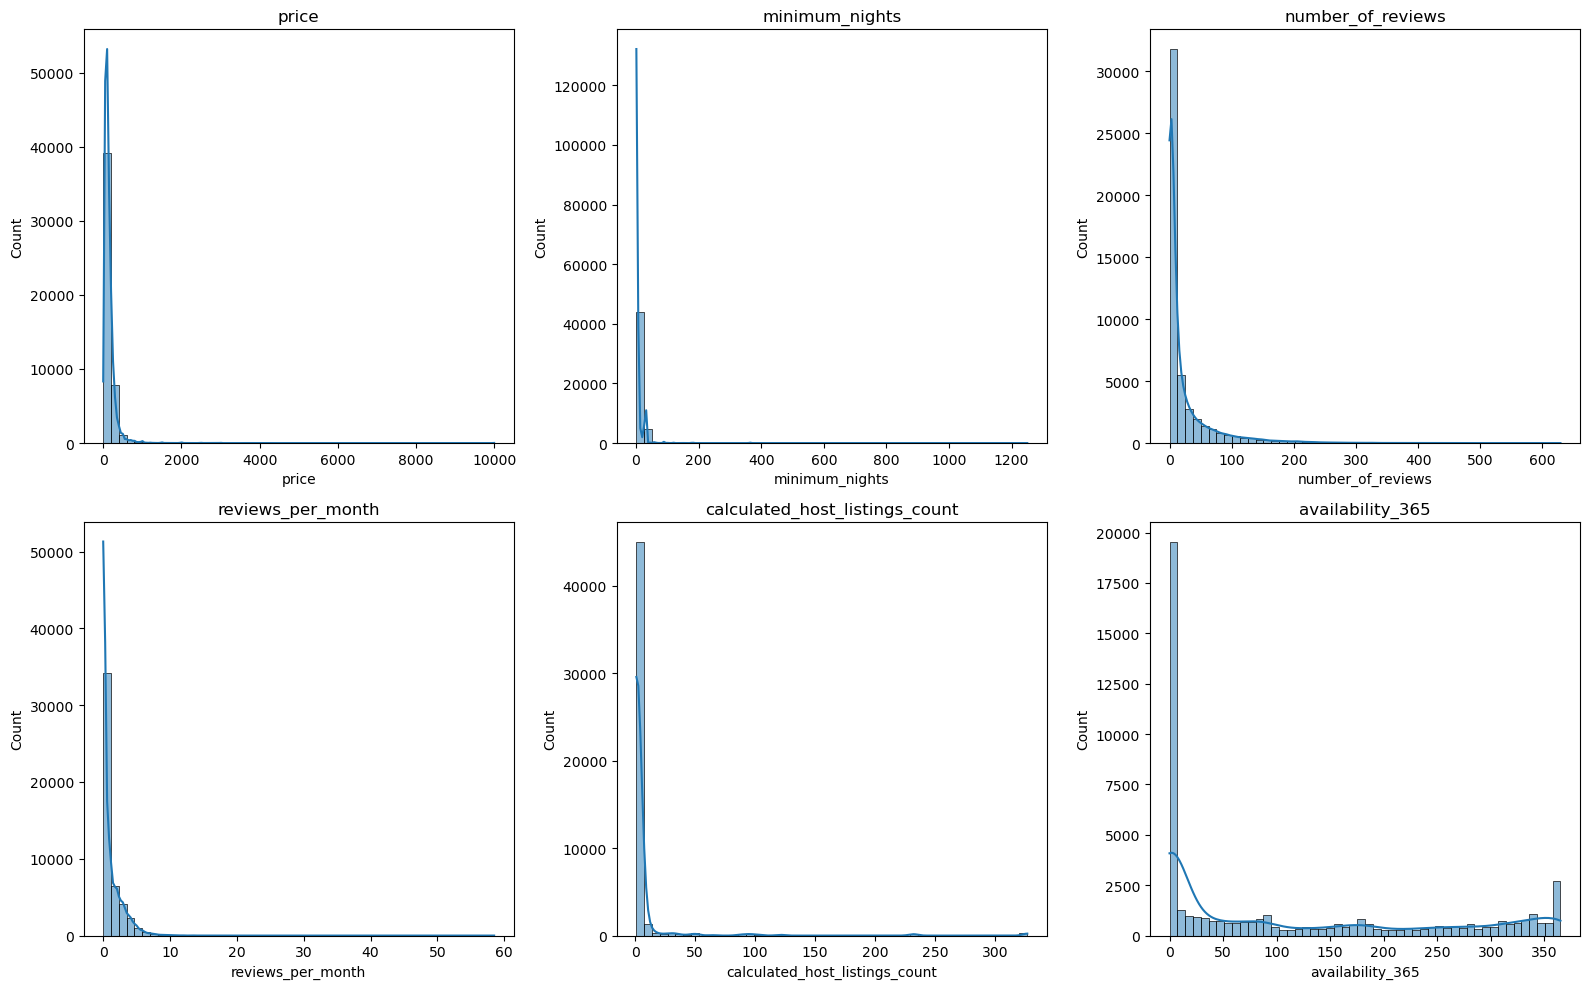

In [18]:
plt.figure(figsize=(16,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3, i)
    sn.histplot(df[col], bins=50, kde=True)
    plt.title(col)

plt.tight_layout()
plt.savefig(r"C:\Users\andre\OneDrive\Data_Cleaning_Portfolio\01_Airbnb_Cleaning_Project\figures\histplot_outliers.png", dpi=300, bbox_inches='tight')

plt.show()

In [19]:
#determinar el percentil 95 y 99 para price
df["price"].quantile(0.99), df["price"].quantile(0.99)

(np.float64(799.0), np.float64(799.0))

In [20]:
#tope de 800 a valores fuera de rango
# los valores fuera de rango pueden alterar el modelo, no perdemos información si le ponemos un tope, al percentil 0,99
df["price"]=np.where(df["price"]>800,800,df["price"])

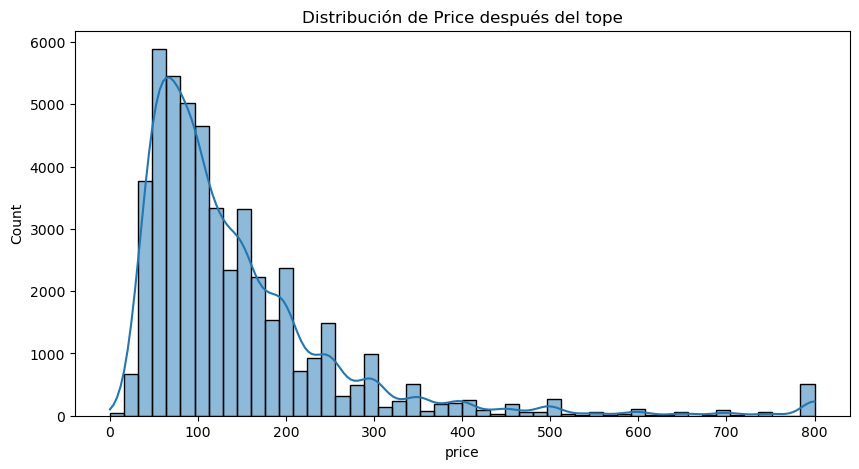

In [21]:
plt.figure(figsize=(10,5))
sn.histplot(df['price'], bins=50, kde=True)
plt.title("Distribución de Price después del tope")
plt.savefig(r"C:\Users\andre\OneDrive\Data_Cleaning_Portfolio\01_Airbnb_Cleaning_Project\figures\distribucion_final_price.png", dpi=300, bbox_inches='tight')

plt.show()

In [22]:
#porcentaje de valores para price = 800
((df['price'] == 800).sum() / len(df)) * 100

np.float64(0.9694242765108907)

In [23]:
#Inspección de variable minimun nights
df["minimum_nights"].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [24]:
df["minimum_nights"].value_counts().sort_index().tail(10)

minimum_nights
364      1
365     29
366      1
370      1
400      1
480      1
500      5
999      3
1000     1
1250     1
Name: count, dtype: int64

In [25]:
#Eliminar valores absurdos, superiores a 365 días, muy pocos valores en el DataSet
df=df[df["minimum_nights"]<=365]
df["minimum_nights"].describe()

count    48881.000000
mean         6.840429
std         16.452017
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        365.000000
Name: minimum_nights, dtype: float64

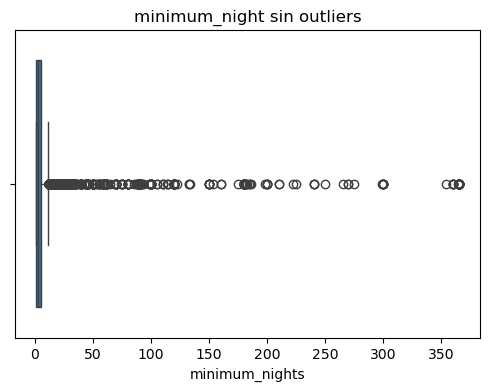

In [26]:
plt.figure(figsize=(6,4))
sn.boxplot(x=df["minimum_nights"])
plt.title("minimum_night sin outliers")
plt.savefig(r"C:\Users\andre\OneDrive\Data_Cleaning_Portfolio\01_Airbnb_Cleaning_Project\figures\distribucion_final_minimun_nights.png", dpi=300, bbox_inches='tight')

plt.show()

In [27]:
#Inspección Reviwes per month
df["reviews_per_month"].describe()

count    48881.000000
mean         1.091179
std          1.597424
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

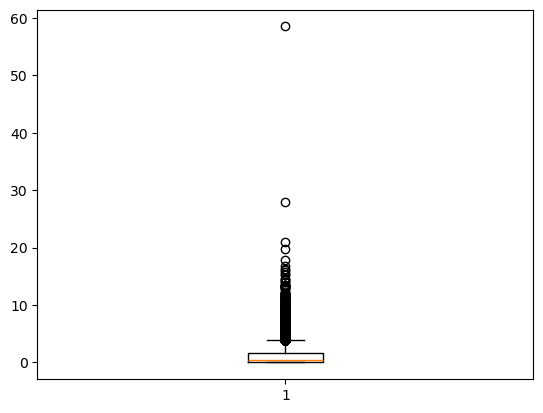

In [28]:
plt.boxplot(x=df["reviews_per_month"])
plt.show()

In [29]:
df["reviews_per_month"].quantile([0.9, 0.95, 0.99])

0.90    3.25
0.95    4.31
0.99    6.80
Name: reviews_per_month, dtype: float64

In [30]:
df[df["reviews_per_month"]>7].sort_values("reviews_per_month", ascending=False).head(20)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
38870,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134
27287,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26
28651,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25
29628,Queens,Springfield Gardens,40.66298,-73.77000,Private room,50,1,302,2019-07-06,16.81,3,26
20403,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
22469,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
36238,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,2019-07-05,15.78,1,28
40297,Queens,Jamaica,40.66793,-73.78452,Private room,67,1,95,2019-07-05,15.32,8,145


In [31]:
# Se puso un tope, a todos los valores superiores al cuantil 0.99 se le colocó ese valor, evita distorción en el modelo, 
p99=df["reviews_per_month"].quantile(0.99)
df["reviews_per_month"]=np.where(df["reviews_per_month"]>p99,p99,df['reviews_per_month']) 
df["reviews_per_month"].describe()

count    48881.000000
mean         1.071295
std          1.478822
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max          6.800000
Name: reviews_per_month, dtype: float64

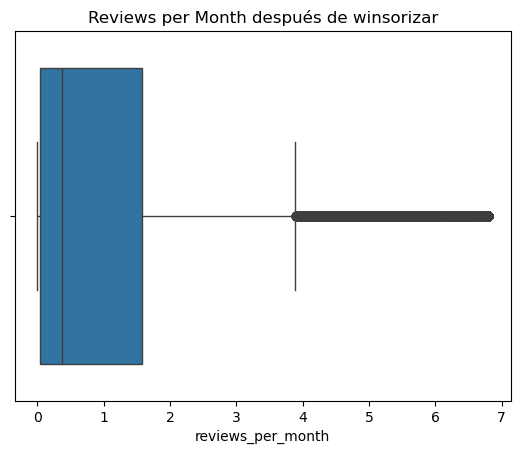

In [32]:
sn.boxplot(x=df['reviews_per_month'])
plt.title("Reviews per Month después de winsorizar")
plt.show()

In [33]:
((df['reviews_per_month'] == p99).sum() / len(df)) * 100

np.float64(1.0044802684069476)

In [34]:
#Inspección de number of reviews
df["number_of_reviews"].describe()

count    48881.000000
mean        23.279618
std         44.555639
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

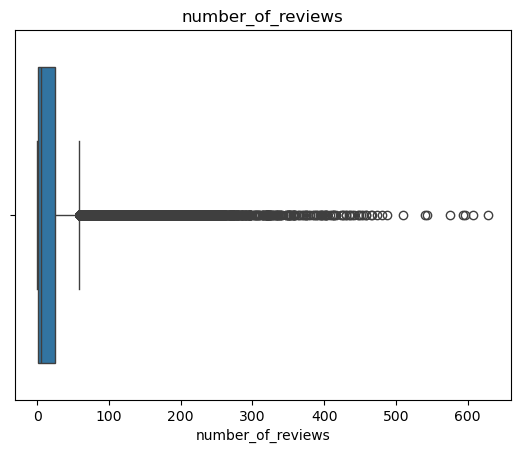

In [35]:
sn.boxplot(x=df['number_of_reviews'])
plt.title('number_of_reviews')
plt.show()

In [36]:
df['number_of_reviews'].quantile(0.99)

np.float64(214.0)

In [37]:
#transformacion logaritmica de datos
#debido a la cola larga a la derechas se busca reducir la escla y verificar si mejora el comportamiento de la variable 
df['number_of_reviews_log']=np.log1p(df['number_of_reviews'])

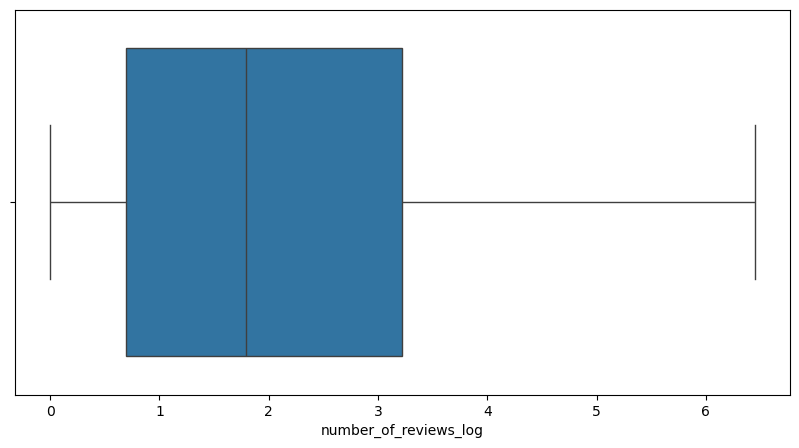

In [38]:
plt.figure(figsize=(10,5))
sn.boxplot(x=df['number_of_reviews_log'])
plt.savefig(r"C:\Users\andre\OneDrive\Data_Cleaning_Portfolio\01_Airbnb_Cleaning_Project\figures\numero_de_reviews_log.png", dpi=300, bbox_inches='tight')

plt.show()

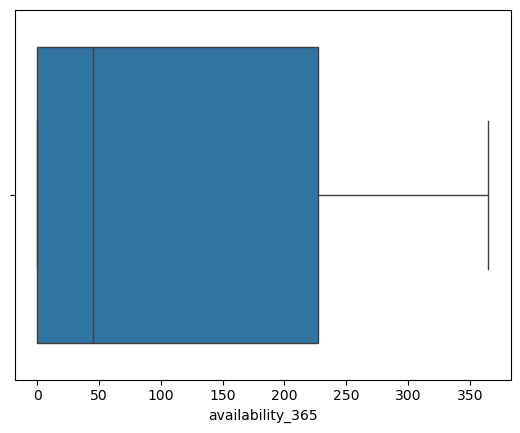

In [39]:
sn.boxplot(x=df['availability_365'])
plt.show()

## Sección 4. Variables categóricas

- Cantidad de categorías por columna  
- Frecuencias de cada categoría  
- Codificación de variables
- Agrupación de variables

In [40]:
# verifiacion de variables categóricas 
for col in ['neighbourhood_group','neighbourhood','room_type']:
    print(col, "→", df[col].nunique(), "categorías")
    print(df[col].value_counts().head())
    print("\n")

neighbourhood_group → 5 categorías
neighbourhood_group
Manhattan        21655
Brooklyn         20098
Queens            5664
Bronx             1091
Staten Island      373
Name: count, dtype: int64


neighbourhood → 221 categorías
neighbourhood
Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2656
Bushwick              2464
Upper West Side       1971
Name: count, dtype: int64


room_type → 3 categorías
room_type
Entire home/apt    25400
Private room       22322
Shared room         1159
Name: count, dtype: int64




In [41]:
#verificar cuantos barrios tienen menos de 100 entradas (menos representativos)
(df['neighbourhood'].value_counts()<100).sum()

np.int64(156)

In [42]:
#agrupar esos barrios en un solo grupo 
barrio_counts=df['neighbourhood'].value_counts()
barrios_principales= barrio_counts[barrio_counts>=100].index

In [43]:
df["neighbourhood_simplified"] = df["neighbourhood"].apply(lambda x: x if x in barrios_principales else "Other")
df["neighbourhood_simplified"].nunique()

66

In [44]:
#codificacion de variables categoricas
cols_categoricas = ['room_type', 'neighbourhood_group', 'neighbourhood_simplified']
df_ohe = pd.get_dummies(df, columns=cols_categoricas, drop_first=True)
df_ohe.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_log,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_simplified_Bay Ridge,neighbourhood_simplified_Bedford-Stuyvesant,neighbourhood_simplified_Boerum Hill,neighbourhood_simplified_Borough Park,neighbourhood_simplified_Brooklyn Heights,neighbourhood_simplified_Bushwick,neighbourhood_simplified_Canarsie,neighbourhood_simplified_Carroll Gardens,neighbourhood_simplified_Chelsea,neighbourhood_simplified_Chinatown,neighbourhood_simplified_Clinton Hill,neighbourhood_simplified_Crown Heights,neighbourhood_simplified_Cypress Hills,neighbourhood_simplified_Ditmars Steinway,neighbourhood_simplified_East Elmhurst,neighbourhood_simplified_East Flatbush,neighbourhood_simplified_East Harlem,neighbourhood_simplified_East New York,neighbourhood_simplified_East Village,neighbourhood_simplified_Elmhurst,neighbourhood_simplified_Financial District,neighbourhood_simplified_Flatbush,neighbourhood_simplified_Flushing,neighbourhood_simplified_Forest Hills,neighbourhood_simplified_Fort Greene,neighbourhood_simplified_Gowanus,neighbourhood_simplified_Gramercy,neighbourhood_simplified_Greenpoint,neighbourhood_simplified_Greenwich Village,neighbourhood_simplified_Harlem,neighbourhood_simplified_Hell's Kitchen,neighbourhood_simplified_Inwood,neighbourhood_simplified_Jackson Heights,neighbourhood_simplified_Jamaica,neighbourhood_simplified_Kensington,neighbourhood_simplified_Kips Bay,neighbourhood_simplified_Little Italy,neighbourhood_simplified_Long Island City,neighbourhood_simplified_Lower East Side,neighbourhood_simplified_Maspeth,neighbourhood_simplified_Midtown,neighbourhood_simplified_Midwood,neighbourhood_simplified_Morningside Heights,neighbourhood_simplified_Murray Hill,neighbourhood_simplified_Nolita,neighbourhood_simplified_Other,neighbourhood_simplified_Park Slope,neighbourhood_simplified_Prospect Heights,neighbourhood_simplified_Prospect-Lefferts Gardens,neighbourhood_simplified_Rego Park,neighbourhood_simplified_Ridgewood,neighbourhood_simplified_Sheepshead Bay,neighbourhood_simplified_SoHo,neighbourhood_simplified_South Slope,neighbourhood_simplified_Sunnyside,neighbourhood_simplified_Sunset Park,neighbourhood_simplified_Theater District,neighbourhood_simplified_Tribeca,neighbourhood_simplified_Upper East Side,neighbourhood_simplified_Upper West Side,neighbourhood_simplified_Washington Heights,neighbourhood_simplified_West Village,neighbourhood_simplified_Williamsburg,neighbourhood_simplified_Windsor Terrace,neighbourhood_simplified_Woodside
0,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,2.302585,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,3.828641,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Harlem,40.80902,-73.94190,150,3,0,NaT,0.00,1,365,0.000000,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [45]:
df_ohe.shape

(48881, 82)

In [46]:
df_ohe["reviews_per_month"] = df_ohe["reviews_per_month"].fillna(0)

In [47]:
df_ohe.drop(columns=["last_review", "neighbourhood", "number_of_reviews"], inplace=True)

In [48]:
df_ohe.isnull().sum()

latitude                                              0
longitude                                             0
price                                                 0
minimum_nights                                        0
reviews_per_month                                     0
calculated_host_listings_count                        0
availability_365                                      0
number_of_reviews_log                                 0
room_type_Private room                                0
room_type_Shared room                                 0
neighbourhood_group_Brooklyn                          0
neighbourhood_group_Manhattan                         0
neighbourhood_group_Queens                            0
neighbourhood_group_Staten Island                     0
neighbourhood_simplified_Bay Ridge                    0
neighbourhood_simplified_Bedford-Stuyvesant           0
neighbourhood_simplified_Boerum Hill                  0
neighbourhood_simplified_Borough Park           

In [49]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48881 entries, 0 to 48894
Data columns (total 79 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   latitude                                            48881 non-null  float64
 1   longitude                                           48881 non-null  float64
 2   price                                               48881 non-null  int64  
 3   minimum_nights                                      48881 non-null  int64  
 4   reviews_per_month                                   48881 non-null  float64
 5   calculated_host_listings_count                      48881 non-null  int64  
 6   availability_365                                    48881 non-null  int64  
 7   number_of_reviews_log                               48881 non-null  float64
 8   room_type_Private room                              48881 non-null  bool   
 9   

## Sección 5. Correlaciones 

- Matriz completa de correlaciones numéricas  
- Ranking de variables más correlacionadas con `price`  
- Mapa de calor de las 15 variables más relevantes

In [50]:
#Correlaciones 
corr_matriz=df_ohe.corr(numeric_only=True)

In [51]:
#correlacion con price
corr_price=corr_matriz['price'].sort_values(ascending=False)
corr_price

price                                                 1.000000
neighbourhood_group_Manhattan                         0.285114
neighbourhood_simplified_Midtown                      0.187411
availability_365                                      0.123194
calculated_host_listings_count                        0.122264
neighbourhood_simplified_West Village                 0.107080
neighbourhood_simplified_Chelsea                      0.105199
neighbourhood_simplified_Tribeca                      0.104524
neighbourhood_simplified_Hell's Kitchen               0.091082
neighbourhood_simplified_SoHo                         0.084007
neighbourhood_simplified_Financial District           0.077949
neighbourhood_simplified_Upper West Side              0.067261
latitude                                              0.060936
neighbourhood_simplified_Greenwich Village            0.060450
neighbourhood_simplified_Murray Hill                  0.060005
neighbourhood_simplified_Theater District             0

In [52]:
top_vars=corr_price.head(15).index

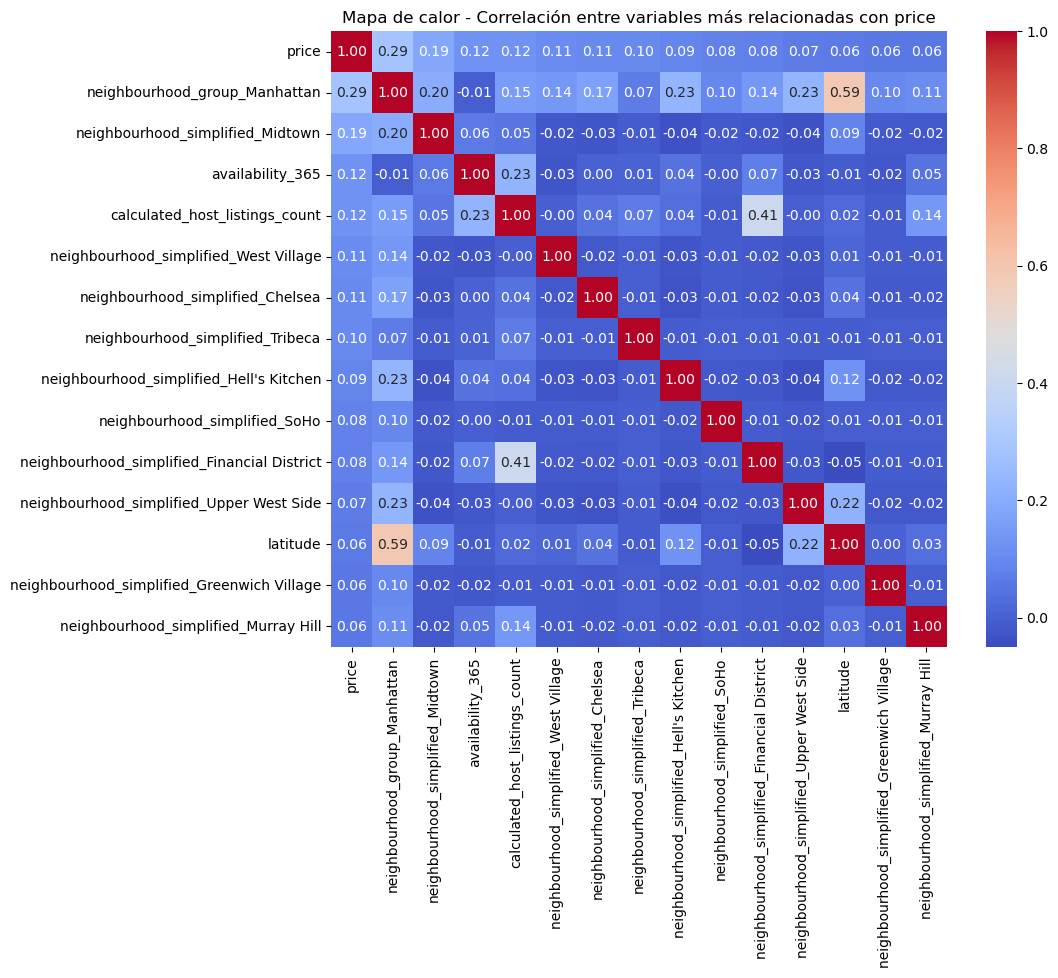

In [53]:
plt.figure(figsize=(10,8))
sn.heatmap(corr_matriz.loc[top_vars, top_vars], 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm",
            square=True)
plt.title("Mapa de calor - Correlación entre variables más relacionadas con price")
plt.savefig(r"C:\Users\andre\OneDrive\Data_Cleaning_Portfolio\01_Airbnb_Cleaning_Project\figures\correlaciones_mapadecalor.png", dpi=300, bbox_inches='tight')

plt.show()

## Sección 6. Exportación del DataSet limpio para modelado

In [54]:
df_ohe.to_csv("airbnb_clean_ohe.csv", index=False)

In [55]:
test = pd.read_csv("airbnb_clean_ohe.csv")
test.head()

,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_log,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_simplified_Bay Ridge,neighbourhood_simplified_Bedford-Stuyvesant,neighbourhood_simplified_Boerum Hill,neighbourhood_simplified_Borough Park,neighbourhood_simplified_Brooklyn Heights,neighbourhood_simplified_Bushwick,neighbourhood_simplified_Canarsie,neighbourhood_simplified_Carroll Gardens,neighbourhood_simplified_Chelsea,neighbourhood_simplified_Chinatown,neighbourhood_simplified_Clinton Hill,neighbourhood_simplified_Crown Heights,neighbourhood_simplified_Cypress Hills,neighbourhood_simplified_Ditmars Steinway,neighbourhood_simplified_East Elmhurst,neighbourhood_simplified_East Flatbush,neighbourhood_simplified_East Harlem,neighbourhood_simplified_East New York,neighbourhood_simplified_East Village,neighbourhood_simplified_Elmhurst,neighbourhood_simplified_Financial District,neighbourhood_simplified_Flatbush,neighbourhood_simplified_Flushing,neighbourhood_simplified_Forest Hills,neighbourhood_simplified_Fort Greene,neighbourhood_simplified_Gowanus,neighbourhood_simplified_Gramercy,neighbourhood_simplified_Greenpoint,neighbourhood_simplified_Greenwich Village,neighbourhood_simplified_Harlem,neighbourhood_simplified_Hell's Kitchen,neighbourhood_simplified_Inwood,neighbourhood_simplified_Jackson Heights,neighbourhood_simplified_Jamaica,neighbourhood_simplified_Kensington,neighbourhood_simplified_Kips Bay,neighbourhood_simplified_Little Italy,neighbourhood_simplified_Long Island City,neighbourhood_simplified_Lower East Side,neighbourhood_simplified_Maspeth,neighbourhood_simplified_Midtown,neighbourhood_simplified_Midwood,neighbourhood_simplified_Morningside Heights,neighbourhood_simplified_Murray Hill,neighbourhood_simplified_Nolita,neighbourhood_simplified_Other,neighbourhood_simplified_Park Slope,neighbourhood_simplified_Prospect Heights,neighbourhood_simplified_Prospect-Lefferts Gardens,neighbourhood_simplified_Rego Park,neighbourhood_simplified_Ridgewood,neighbourhood_simplified_Sheepshead Bay,neighbourhood_simplified_SoHo,neighbourhood_simplified_South Slope,neighbourhood_simplified_Sunnyside,neighbourhood_simplified_Sunset Park,neighbourhood_simplified_Theater District,neighbourhood_simplified_Tribeca,neighbourhood_simplified_Upper East Side,neighbourhood_simplified_Upper West Side,neighbourhood_simplified_Washington Heights,neighbourhood_simplified_West Village,neighbourhood_simplified_Williamsburg,neighbourhood_simplified_Windsor Terrace,neighbourhood_simplified_Woodside
0,40.64749,-73.97237,149,1,0.21,6,365,2.302585,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,40.75362,-73.98377,225,1,0.38,2,355,3.828641,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,40.80902,-73.94190,150,3,0.00,1,365,0.000000,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,